# GRIP:The Sparks Foundation
### Data Science and Business Analytics Internship
### TASK 2- In the given iris dataset, predict the optimum number of clusters and represent it visually.
### Author:Gaurav Dobhal



In [12]:
# Importing the required libraries

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [46]:
#reading data
df=pd.read_csv("iris dataset.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df=pd.read_csv("iris dataset.csv")

## Visualizing data

In [47]:

df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
df.shape

(150, 6)

In [49]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [50]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:
iris_df=df.copy()
iris_df = iris.drop(columns= ['Species' ,'Id'] )
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
iris = pd.DataFrame(df)

# K Means Clustering

In [91]:
from sklearn.cluster import KMeans

In [68]:
within_cluster_sum_of_square = []

clusters_range = range(1,10)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

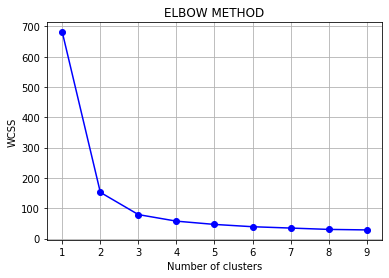

In [75]:
# Plotting the "within-cluster sum of square" against clusters range


plt.plot(clusters_range, within_cluster_sum_of_square,  color='blue',marker='o')
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# applying k means clustering on data

In [76]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

# visualization of clusters

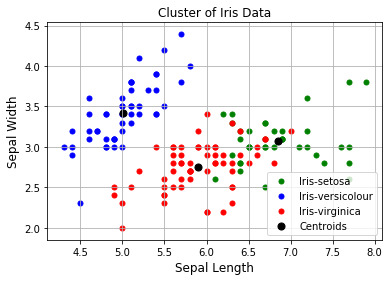

In [87]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'green', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'red', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length', fontsize =12)
plt.ylabel('Sepal Width', fontsize =12)
plt.legend()
plt.grid()
plt.show()